Theta: 53.13 degrees


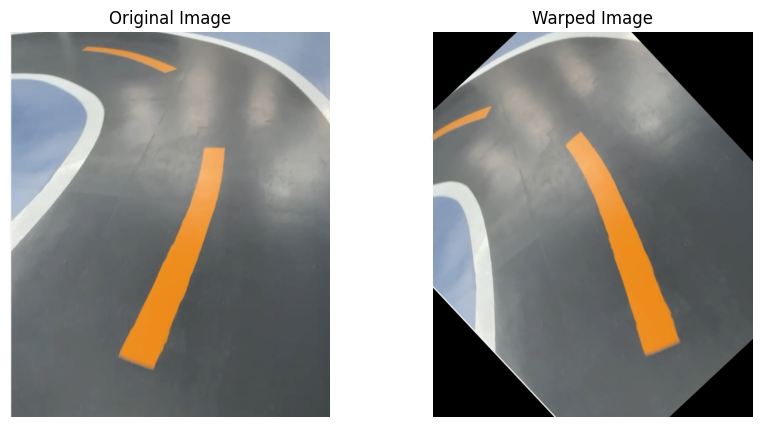

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image\
image = cv2.imread(r"C:\\Users\\USER\\Pictures\\Screenshots\\line.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Define the source points (corners of the input image region)
src_points = np.float32([
    [100, 100],  # Top-left corner
    [400, 100],  # Top-right corner
    [100, 300],  # Bottom-left corner
    [400, 300]   # Bottom-right corner
])

# Define the destination points (where we want the source points to be mapped)
dst_points = np.float32([
    [0, 0],          # Top-left corner in destination
    [500, 0],        # Top-right corner in destination
    [0, 500],        # Bottom-left corner in destination
    [500, 500]       # Bottom-right corner in destination
])
import math

def calculate_theta(x1, y1, x2, y2):
    # Calculate the absolute difference in y-coordinates and x-coordinates
    delta_y = abs(y2 - y1)
    delta_x = abs(x2 - x1)

    # Calculate the arctangent of the ratio of the differences
    theta_radians = math.atan(delta_y / delta_x)

    # Convert radians to degrees
    theta_degrees = theta_radians * (180 / math.pi)

    return theta_degrees

# Example usage
x1, y1 = 1, 2
x2, y2 = 4, 6
theta = calculate_theta(x1, y1, x2, y2)

print(f"Theta: {theta:.2f} degrees")
# Calculate the perspective transformation matrix
angle = theta -10 # 45度回転
scale = 1.0  # スケール1.0（サイズ変更なし）

# 回転行列を計算
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the perspective transformation
warped_image = cv2.warpAffine(image, M, (w, h))

# Display the original and warped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Warped Image')
plt.imshow(warped_image)
plt.axis('off')

plt.show()


In [13]:
import pytesseract
import re
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text1 = pytesseract.image_to_string(warped_image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text1)
text = ""
for t in text1:
    if t == "$":
        t = "S"
    text += t
print(clean_text, "text: ", text , "원본: ", text1)

Lan
fs
 text:  Lan
fs
 원본:  Lan
fs

